# Machine Learning in Action

## chapter2  KNN

In [1]:
from numpy import *
import operator
from os import listdir

def creatDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [2]:
group,labels = creatDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


In [26]:
## K近邻算法
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort() ##距离的计算
    
    classCount = {}
    for i in range(k): ##选择距离最小的K个点
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    ## 排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [27]:
classify0([0,0],group,labels,3)

'B'

### 使用KNN改进约会网站的匹配效果

In [50]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())       
    returnMat = zeros((numberOfLines,3))        
    classLabelVector = []                       
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [51]:
datingDataMat,datingLabels = file2matrix('Desktop/machineLearingInAction/machinelearninginaction/Ch02/datingTestSet2.txt')

In [52]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [53]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

%matplotlib inline

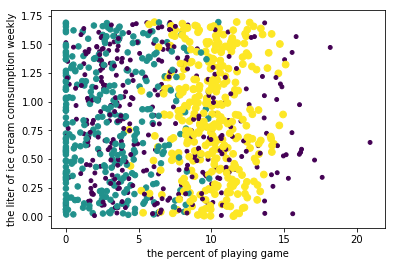

In [60]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.xlabel('the percent of playing game')
plt.ylabel('the liter of ice cream comsumption weekly')
plt.show()

In [61]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   
    return normDataSet, ranges, minVals

In [70]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [71]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [72]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [73]:
minVals

array([0.      , 0.      , 0.001156])

In [91]:
def datingClassTest():
    hoRatio = 0.03     #hold out 10%
    datingDataMat,datingLabels = file2matrix('Desktop/machineLearingInAction/machinelearninginaction/Ch02/datingTestSet2.txt')       
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d"%(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [92]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

### 手写数字识别系统

In [93]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [96]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]    
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')       
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))

## chapter3 决策树